In [28]:
pip install --no-deps fastai fastbook fastprogress torch


Note: you may need to restart the kernel to use updated packages.


In [29]:
from fastbook import *
import os

In [33]:
urls = search_images_ddg('bird photos', max_images = 2)
len(urls), urls[0]

(2, 'http://img.chan4chan.com/img/2010-11-23/2259472230_9f912863de_o.jpg')

In [41]:
from fastdownload import download_url
dest = Path('bird.jpg')
if not dest.exists():
    download_url(urls[0], dest, show_progress = false)
                                   

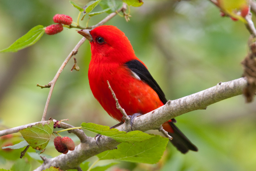

In [35]:
im = Image.open(dest)
im.to_thumb(256,256)

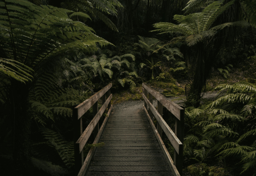

In [43]:
download_url(search_images_ddg('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)


In [45]:
searches= 'forest', 'bird'
path = Path('bird_or_not')

if not path.exists():
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True, parents=True)
        results = search_images_ddg(f'{o} photo')
        download_images(dest, urls = results[:200])
        resize_images(dest, max_size = 400, dest = dest)

        


In [46]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

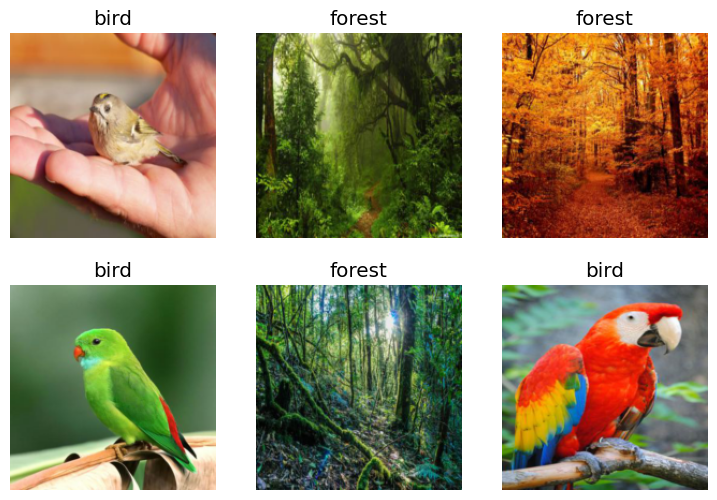

In [47]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct =0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n = 6)

In [48]:
learn = cnn_learner(dls, resnet18, metrics =error_rate)
learn.fine_tune(3)

c:\Users\INDIA\anaconda3\Lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\INDIA/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:08<00:00, 5.47MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.824993,2.131321,0.520548,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.056570,0.052223,0.013699,00:25
1,0.032059,0.000932,0.000000,00:25
2,0.023308,0.001234,0.000000,00:26


In [49]:
is_bird, _, probs = learn.predict(PILImage.create('bird.jpg'))
print(f"this is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

this is a: bird.
Probability it's a bird: 1.0000


In [50]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
 path, bs = 8, fnames = get_image_files(path/'images'),
 label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype = str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\INDIA/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:22<00:00, 3.82MB/s]


epoch,train_loss,valid_loss,time
0,3.104702,2.407520,00:34


epoch,train_loss,valid_loss,time
0,1.806016,1.590357,00:35
1,1.602650,1.428242,00:34
2,1.470313,1.407115,00:34
3,1.338048,1.127515,00:34
4,1.204953,1.018135,00:33
5,1.088785,0.947033,00:34
6,0.992948,0.941420,00:33
7,0.918563,0.928075,00:35


In [52]:
from fastai.tabular.all import *
path  = untar_data(URLs.ADULT_SAMPLE)


dls = TabularDataLoaders.from_csv(path/'adult.csv', path = path, y_names = 'salary',
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

dls.show_batch()

c:\Users\INDIA\anaconda3\Lib\site-packages\fastai\tabular\core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


,workclass,education,marital-status,occupation,relationship,education-num_na,age,fnlwgt,education-num,salary
0,State-gov,Some-college,Never-married,Other-service,Own-child,False,31.000000,113128.999023,10.0,<50k
1,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,False,20.000001,148939.998640,9.0,<50k
2,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Husband,False,37.000000,189921.999989,12.0,>=50k
3,Private,Bachelors,Never-married,Adm-clerical,Not-in-family,False,22.999999,121470.997500,13.0,<50k
4,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,False,42.000000,182301.999961,9.0,<50k
5,Private,Some-college,Never-married,Sales,Own-child,False,18.999999,243940.999324,10.0,<50k
6,Private,Some-college,Married-civ-spouse,Transport-moving,Husband,False,55.000000,197114.000235,10.0,>=50k
7,Private,Some-college,Never-married,Adm-clerical,Not-in-family,False,18.999999,115247.997050,10.0,<50k
8,Private,Bachelors,Married-civ-spouse,Craft-repair,Husband,False,41.000000,221171.999042,13.0,>=50k
9,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,False,44.000000,172479.000603,13.0,>=50k


In [53]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.375863,0.374777,0.826014,00:04
1,0.366500,0.359273,0.835995,00:04
2,0.352526,0.358189,0.835688,00:04


In [54]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

In [55]:
dls.show_batch()

,userId,movieId,rating
0,518,1240,4.0
1,212,778,5.0
2,77,380,2.5
3,195,1036,1.0
4,596,924,3.5
5,199,527,4.5
6,199,1200,5.0
7,213,1196,5.0
8,15,1206,5.0
9,199,50,4.5


In [56]:
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.495481,1.404502,00:00


epoch,train_loss,valid_loss,time
0,1.371447,1.346535,00:00
1,1.294014,1.176939,00:00
2,1.048706,0.891475,00:00
3,0.825209,0.747275,00:00
4,0.696313,0.701659,00:00
5,0.637493,0.688206,00:00
6,0.629635,0.686222,00:00
7,0.626574,0.685223,00:00
8,0.605301,0.684533,00:00
9,0.599396,0.684324,00:00


In [57]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,98.0,77.0,5.0,4.776636
1,28.0,68.0,4.0,2.832478
2,99.0,45.0,4.5,4.439023
3,41.0,55.0,4.0,4.349003
4,19.0,94.0,4.5,3.563643
5,77.0,44.0,5.0,3.346414
6,29.0,72.0,3.0,3.170221
7,50.0,93.0,4.0,3.297143
8,92.0,58.0,4.0,4.103926
